## PART I
The given file ‘data.txt’ has 32 columns, first one of which is the identifier, second column is the diagnosis (benign/malignant) and the rest of the 30 columns represent the features derived from the fine needle image of the breast mass. They describe the characteristics of the cell nuclei present in the image.

In [40]:
#Converting data file format from txt to csv for the analysis.
import pandas as pd

read_file = pd.read_csv (r'data.txt')
read_file.to_csv (r'data.csv', index=None)

In [2]:
#Loading and visualizing the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,NaN,20.38,77.58,NaN,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.shape

(569, 32)

### Q1. There are a few missing values in the data. Identify what fraction of observations have missing values and devise a strategy for the missing value imputation.

In [4]:
#View features and Missing Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              541 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                528 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_sd                569 non-null    float64
 13  texture_sd               569 non-null    float64
 14  perimeter_sd             5

In [5]:
data.isnull().sum()

id                          0
diagnosis                   0
radius_mean                28
texture_mean                0
perimeter_mean              0
area_mean                  41
smoothness_mean             0
compactness_mean            0
concavity_mean              0
concave_points_mean         0
symmetry_mean               0
fractal_dimension_mean      0
radius_sd                   0
texture_sd                  0
perimeter_sd                0
area_sd                     0
smoothness_sd               0
compactness_sd              0
concavity_sd                0
concave_points_sd           0
symmetry_sd                 0
fractal_dimension_sd        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave_points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

It is clearly visible that the features radius_mean and area_mean have missing values. The missing values are given as NaN. We are going to use SimpleImputer from sklearn.impute package using mean startegy for the imputation of missing values

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
data.radius_mean = imputer.fit_transform(data['radius_mean'].values.reshape(-1,1))[:,0]
data.area_mean = imputer.fit_transform(data['area_mean'].values.reshape(-1,1))[:,0]
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99000,10.38,122.80,1001.000000,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57000,17.77,132.90,1326.000000,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69000,21.25,130.00,1203.000000,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,14.17541,20.38,77.58,659.519697,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29000,14.34,135.10,1297.000000,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#dropping the column id as it has no significant contribution
data.drop(['id'], axis = 1, inplace = True)
#replacing the M or B in diagnosis to 0 and 1
data['diagnosis'] = data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99000,10.38,122.80,1001.000000,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57000,17.77,132.90,1326.000000,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69000,21.25,130.00,1203.000000,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,14.17541,20.38,77.58,659.519697,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29000,14.34,135.10,1297.000000,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Q2. What does the distribution of each of those features look like? Explain your answer with the help of graphs and summary statistics.

In [8]:
x = data.drop(columns =['diagnosis'])
y= data['diagnosis']

Number of Benign:  357
Number of Malignant :  212


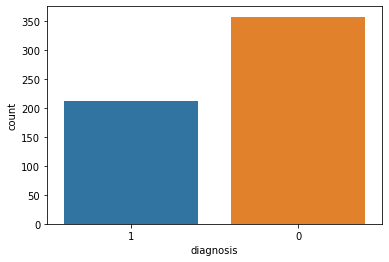

In [48]:
import warnings
warnings.filterwarnings("ignore")
ax = sns.countplot(y,label="Count")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave_points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>],
       [<AxesSubplot:title={'center':'radius_sd'}>,
        <AxesSubplot:title={'center':'texture_sd'}>,
        <AxesSubplot:title={'center':'perimeter_sd'}>,
        <AxesSubplot:title={'center':'area_sd'}>,
        <AxesSubplot:title={'center':'smoothness_sd'}>],
       [<AxesSubplot:title={'center':'compactness_sd'}>,
        <AxesSubplot:title={'center':'concavity_sd'}>,
        <AxesSubplot:title={'center':'concav

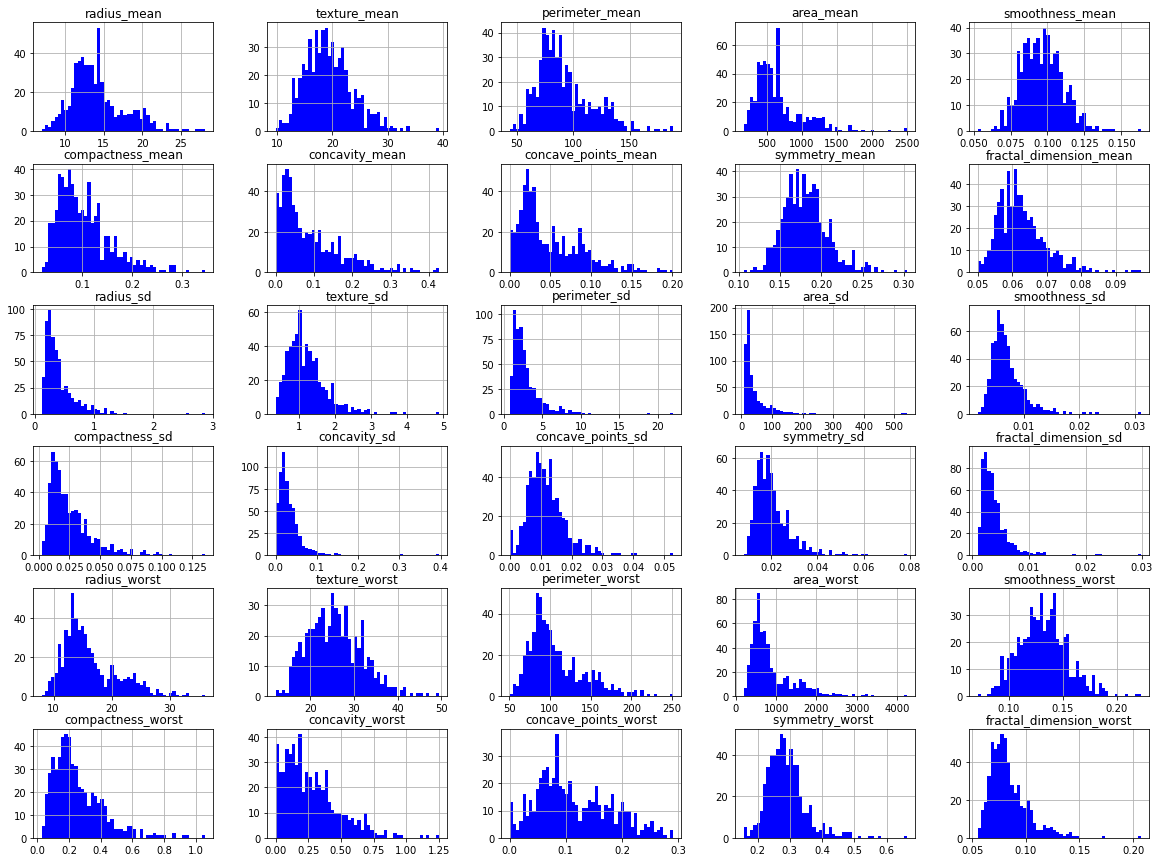

In [49]:
#Distribution of the features
data.hist(bins=50,figsize=(20,15),color='blue',lw=0)

Most feature distributions are skewed to the right, they rise very sharply in the beginning (i.e. for very small values near zero), peaks out early, then decreases sharply and leave the long tail. Each histogram is similar to lognormal distribution, a continuous distribution in which the logarithm of a variable has a normal distribution

In [50]:
#Summary statistics showing distribution of numerical features across the dataset
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.175410,19.289649,91.969033,659.519697,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.439312,4.301036,24.298981,338.514087,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,170.400000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.840000,16.170000,75.170000,432.000000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.590000,18.840000,86.240000,575.300000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.710000,21.800000,104.100000,758.600000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


###  Q.3 Are the scales of the features in the similar range? If not, normalise the data for downstream analysis. You could use either standard scaling (z-score transformation) or min-max scaling. Also, explain why scaling is useful.


The scales of the features are not in the similar range, for example we can see that area_mean and smoothness_means are not on the same scale. 
If a feature’s variance is orders of magnitude more than the variance of other features, that particular feature might dominate other features in the dataset, resulting in unscaled features.
The machine learning algorithms do not converge well when facing unscaled features. Moreover, it is much more difficult to visualize our data when the features are not at the same scale. For these two reasons, we need a normalization of our features, prior to anything else (vizualisation, feature selection, classification algorithm). It is used in machine learning to make model training less sensitive to the scale of features.

In [9]:
from sklearn.model_selection import train_test_split
x = data.drop(columns =['diagnosis'])
y= data['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [52]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

### Q.4  Create a heatmap of the normalised data with features in rows and observations in columns. Reorder the columns such that the samples from the same class are grouped together. Also, do k-means clustering on the rows and rearrange them so that featuresfrom the same group lie together. What do you infer from the heatmap and the clustering results?

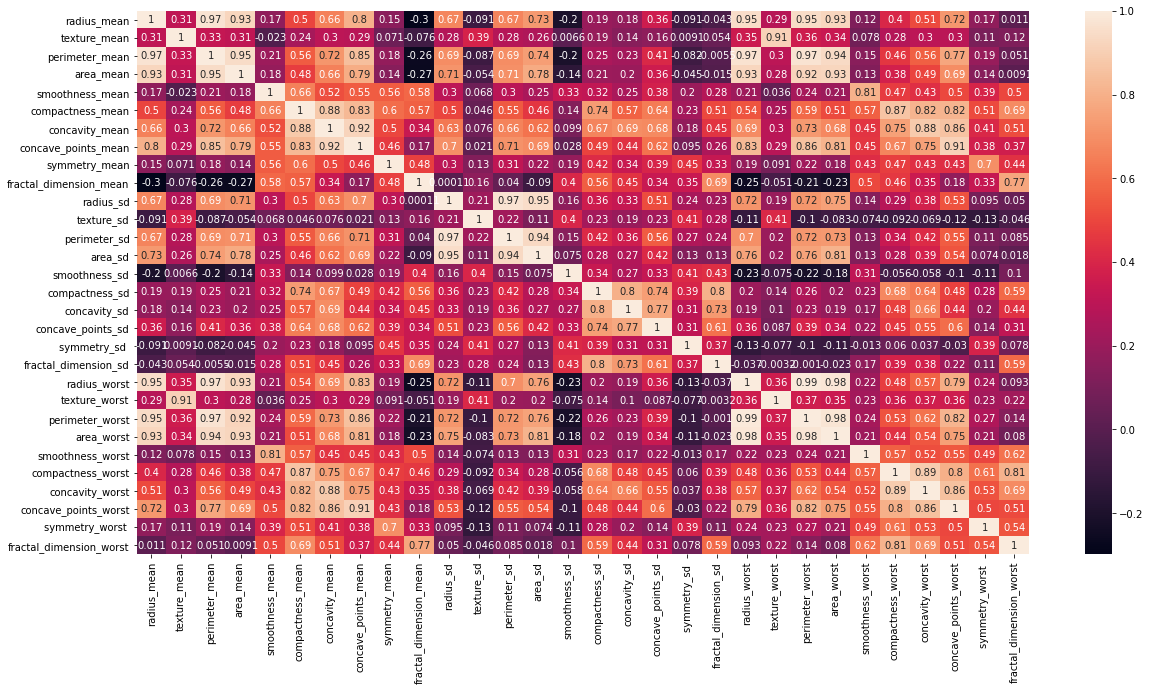

In [53]:
#Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.ioff()

<AxesSubplot:>

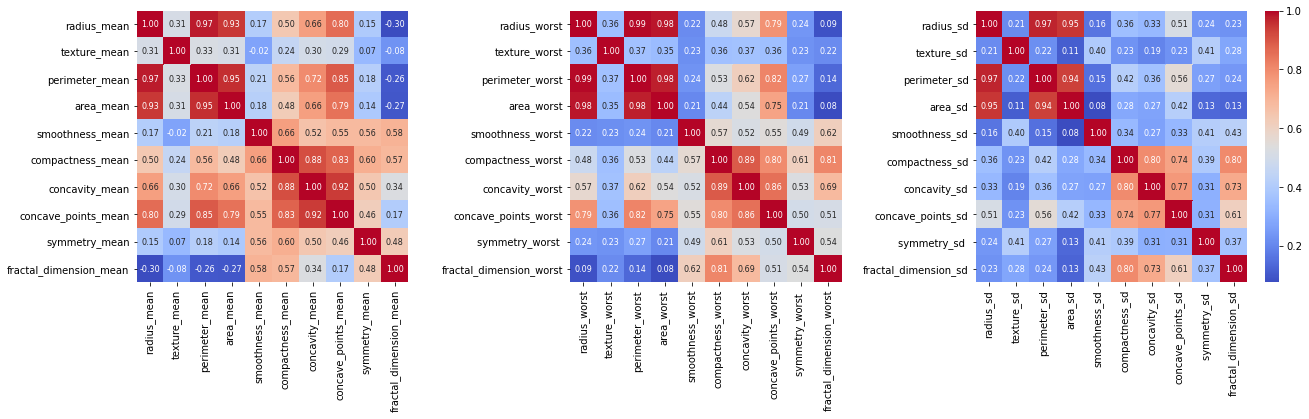

In [54]:
#Reorder the columns such that the samples from the same class are grouped together.
data_features = data[data.columns[1:31]]
data_features_mean= data_features[data_features.columns[0:10]]
data_features_sd= data_features[data_features.columns[10:20]]
data_features_worst = data_features[data_features.columns[20:30]]
plt.figure(figsize=(22,5))
plt.subplot(1, 3, 1)
sns.heatmap( data_features_mean.corr(), cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},cmap= 'coolwarm')
plt.subplot(1, 3, 2)
sns.heatmap(data_features_worst.corr(), cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},cmap= 'coolwarm')
plt.subplot(1, 3, 3)
sns.heatmap(data_features_sd.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},cmap= 'coolwarm')

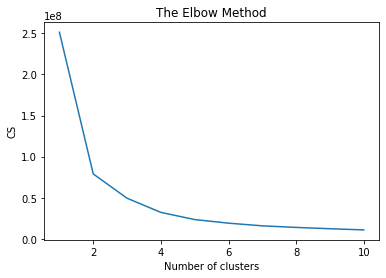

In [55]:
#kmeans
#finding optimum number of clusters for k-means
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters') 
plt.ylabel('CS')
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.049s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 24.554510
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.284878
[t-SNE] KL divergence after 4000 iterations: 0.217024


Text(0.5, 1.0, 'Actual clusters')

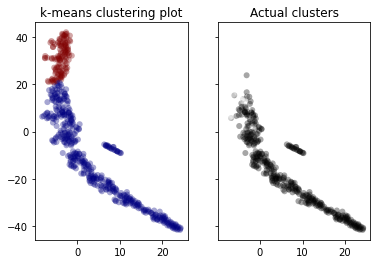

In [56]:
#K-means
# Creating the high dimensional feature space x
data_drop = data.drop('diagnosis',axis=1)
x = data_drop.values
#Creating a 2D visualization to visualize the clusters
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
y = tsne.fit_transform(x)
#Cluster using k-means
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
kY = kmns.fit_predict(x)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(y[:,0],y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(y[:,0],y[:,1],  c = data['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

In [57]:
#Applying kmeans to the dataset (method 2)
# For clustering we do not need labels, since we are identifying the labels.
dataWithoutLabels = data.drop(["diagnosis"], axis = 1)
dataWithoutLabels.head()
dataWithoutLabels = data.loc[:,['radius_mean','texture_mean']]
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(dataWithoutLabels)
dataWithoutLabels["type"] = clusters
dataWithoutLabels["type"].unique()
kmeans = KMeans(n_clusters=2, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

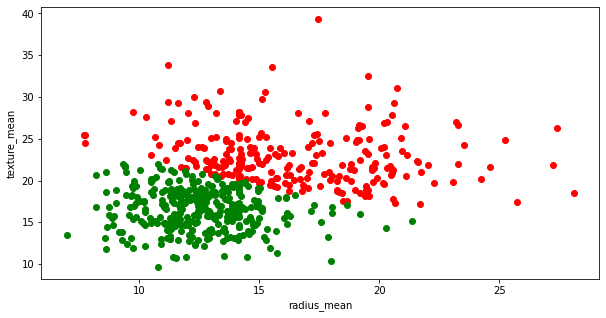

In [58]:
plt.figure(figsize = (10, 5))
plt.scatter(dataWithoutLabels["radius_mean"][dataWithoutLabels["type"] == 0], dataWithoutLabels["texture_mean"][dataWithoutLabels["type"] == 0], color = "red")
plt.scatter(dataWithoutLabels["radius_mean"][dataWithoutLabels["type"] == 1], dataWithoutLabels["texture_mean"][dataWithoutLabels["type"] == 1], color = "green")
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()

#What do you infer from the heatmap and the clustering results?

From the heatmap we can see the correlation between the features like the radius_mean, perimeter_mean and area_mean are correlated with each other so we can only use area_mean. Compactness_mean, concavity_mean and concave points_mean are correlated. Radius_sd, perimeter_sd and area_sd are correlated.Compactness_sd, concavity_sd and concave points_sd are correlated,etc. 

Another Looking at the matrix, we can immediately verify the presence of multicollinearity between some of our variables. For instance, the radius_mean column has a correlation of 1 and 0.99 with perimeter_mean and area_mean columns, respectively. This is probably because the three columns essentially contain the same information, which is the physical size of the observation (the cell). Therefore, we can choose to pick one of the three columns when we go into further analysis.

Another place where multicollienartiy is apparent is between the "mean" columns and the "worst" column. For example, the radius_mean column has a correlation of 0.97 with the radius_worst column. In fact, each of the 10 key attributes display very high (from 0.7 up to 0.97) correlations between its "mean" and "worst" columns.

From the clustering result we can infer that the features like the texture_mean and the radius_mean are observed in different clusters and thus can be used for further analysis.


### Q.5 Generate a suitable visualization which can help examine the differences in the distribution of the features between the malignant and the benign tumors.

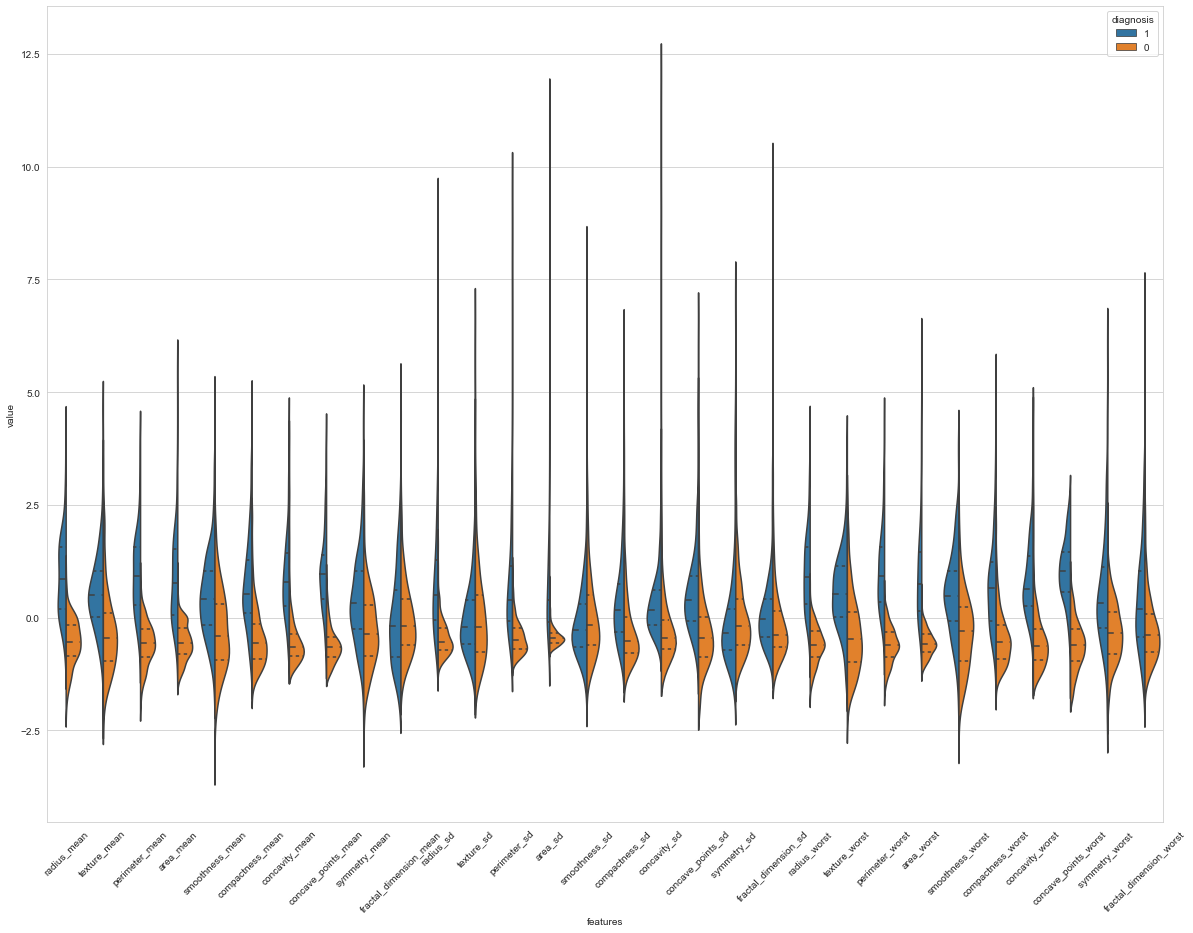

In [123]:
#Violin plot, here 1 represents malignant and 0 represnts benign
data = x
data_n_2 = (data - data.mean()) / (data.std())   
data = pd.concat([y,data_n_2], axis = 1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,15))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=45);

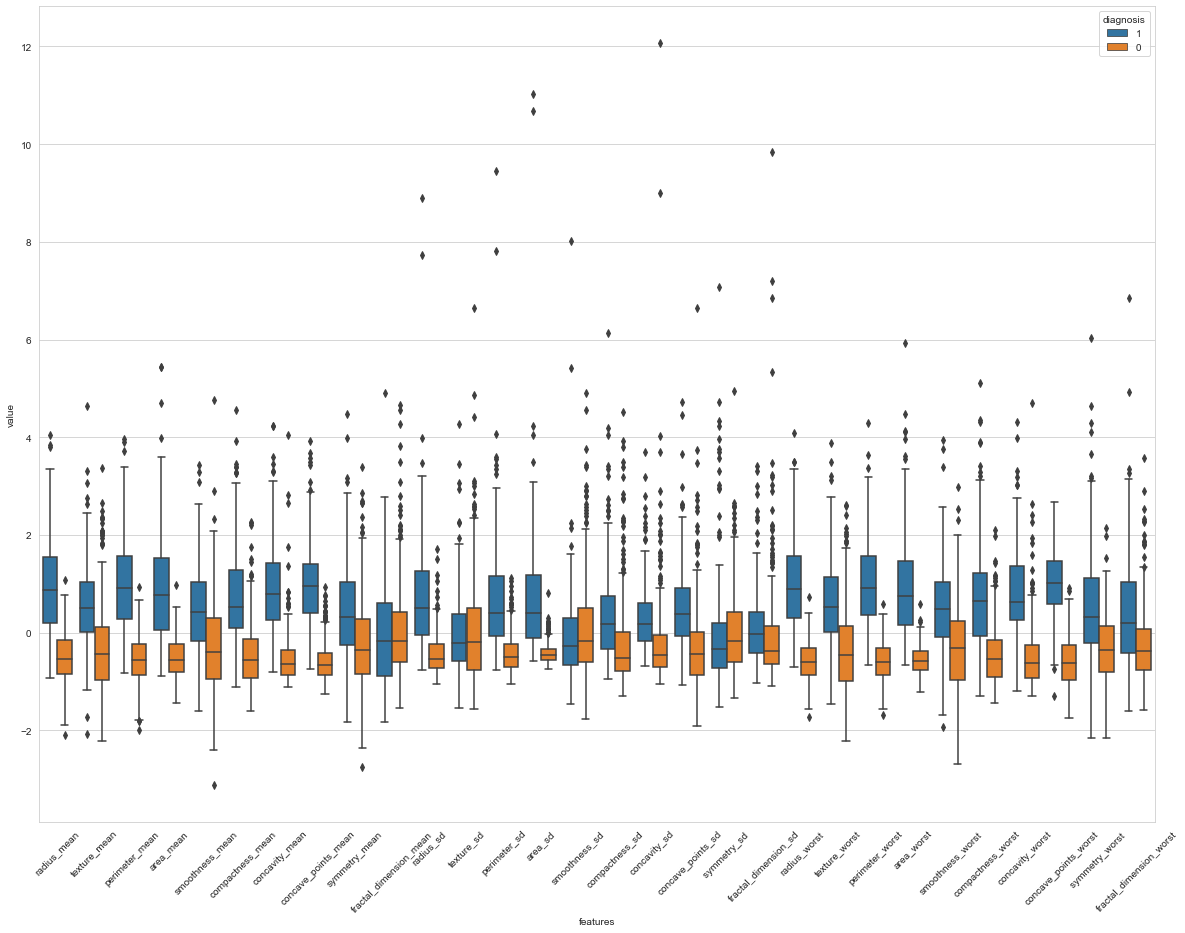

In [124]:
#boxplots
plt.figure(figsize=(20,15))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=45);

### Q.6 Can you pick up the top 5 features which are best discriminating between the two classes visually?

The top five features which i would choose visually:
area_sd,
area_mean,
texture_mean,
concave_points_worst,
perimeter_worst

## PART II
### Q.7 . Perform t-tests for each feature to check if the difference between the means of the two diagnosis classes (benign/malignant) are significantly different from each other. [Use significance level (alpha) = 0.05]
### (a) Compile the t-test results from all the features in the form of a table with 3columns - feature name, t-statistic and p-value.


In [135]:
from scipy import stats 
results = pd.DataFrame() # dataframe to store your ttest results 
features = data.columns.drop(['diagnosis']) 

for index, feature in enumerate(features): 
    malignant = data.loc[data['diagnosis'] == "1", feature] 
    benign= data.loc[data['diagnosis'] == "0", feature]
     # performs ttest. it returns a list of values containing the t-statistic and pvalue
    res = stats.ttest_ind(malignant,benign) 
    results.loc[index, "features"] = feature
    results.loc[index, "t-statistic"] = res[0] 
    results.loc[index, "p-value"] = res[1] 
    
results


,features,t-statistic,p-value
0,radius_mean,24.104395,6.561812e-89
1,texture_mean,10.867201,4.058636e-25
2,perimeter_mean,26.405213,8.436251e-101
3,area_mean,22.638032,2.572107e-81
4,smoothness_mean,9.146099,1.051850e-18
5,compactness_mean,17.698392,3.938263e-56
6,concavity_mean,23.103963,9.966556e-84
7,concave_points_mean,29.354319,7.101150e-116
8,symmetry_mean,8.338312,5.733384e-16
9,fractal_dimension_mean,-0.305711,7.599368e-01


### Q.7 (b) Reorder the rows of the table by increasing p-value. How many features do you identify as being significant by the individual t-tests done on each of them?

In [136]:
results = results.sort_values(by = "p-value").set_index("features")
results

,t-statistic,p-value
features,,
concave_points_worst,31.054555,1.969100e-124
perimeter_worst,29.965717,5.771397e-119
concave_points_mean,29.354319,7.101150e-116
radius_worst,29.339082,8.482292e-116
perimeter_mean,26.405213,8.436251e-101
area_worst,25.721590,2.828848e-97
radius_mean,24.104395,6.561812e-89
concavity_mean,23.103963,9.966556e-84
area_mean,22.638032,2.572107e-81


### Q.7 (c) Pick the top 5 features from the table and see if they match with the features you identified in Q6 and explain the differences if any.


The top 5 features from the table are: concave_points_worst, perimeter_worst, concave_points_mean, radius_worst, perimeter_mean. Two features match from the features identified visually in the previous question. Rest of the features are different, this could be because of p values observed or difference in plot visualization. 

### Q.8 In the question above, there were 30 hypotheses tested against the target (diagnosis) with a significance level of 0.05, so there is a good probability that a few of the features will come up as being significant just by random chance.
### (a) Calculate the probability of at least one significant result due to chance?
 

In [137]:
statistic, p_value = stats.ttest_rel(data.radius_mean,data.area_mean)
print('p-value: ',p_value)

p-value:  2.698239590113381e-193


### (b) Apply Bonferroni correction and explain the results. How many features are significant now?


In [140]:
from statsmodels.sandbox.stats.multicomp import multipletests
pvals = [1.969100e-124, 5.771397e-119, 7.101150e-116, 8.482292e-116, 8.436251e-101, 2.828848e-97, 6.561812e-89, 9.966556e-84, 2.572107e-81, 2.464664e-72, 3.938263e-56, 7.069816e-55, 9.738949e-50, 1.651905e-47, 5.895521e-46, 1.078057e-30, 6.575144e-26, 2.951121e-25, 4.058636e-25, 3.072309e-24, 1.051850e-18, 5.733384e-16, 2.316432e-15, 9.975995e-13, 8.260176e-10, 6.307355e-02, 1.102966e-01, 7.599368e-01, 8.433320e-01, 8.766418e-01                ]

In [139]:
# Create a list of the adjusted p-values
p_adjusted = multipletests(pvals, alpha=.05, method='bonferroni')

# Print the resulting conclusions
print(p_adjusted[0])

# Print the adjusted p-values themselves 
print(p_adjusted[1])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False False False False]
[5.9073000e-123 1.7314191e-117 2.1303450e-114 2.5446876e-114
 2.5308753e-099 8.4865440e-096 1.9685436e-087 2.9899668e-082
 7.7163210e-080 7.3939920e-071 1.1814789e-054 2.1209448e-053
 2.9216847e-048 4.9557150e-046 1.7686563e-044 3.2341710e-029
 1.9725432e-024 8.8533630e-024 1.2175908e-023 9.2169270e-023
 3.1555500e-017 1.7200152e-014 6.9492960e-014 2.9927985e-011
 2.4780528e-008 1.0000000e+000 1.0000000e+000 1.0000000e+000
 1.0000000e+000 1.0000000e+000]


25 features are significant now. 

### (c) Apply BH correction and explain the results. Does the list of significant features change?


In [141]:
# Create a list of the adjusted p-values
p_adjusted = multipletests(pvals, alpha=.05, method='fdr_bh')
# Print the resulting conclusions
print(p_adjusted[0])

# Print the adjusted p-values themselves 
print(p_adjusted[1])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False False False False]
[5.90730000e-123 8.65709550e-118 6.36171900e-115 6.36171900e-115
 5.06175060e-100 1.41442400e-096 2.81220514e-088 3.73745850e-083
 8.57369000e-081 7.39399200e-072 1.07407173e-055 1.76745400e-054
 2.24744977e-049 3.53979643e-047 1.17910420e-045 2.02135688e-030
 1.16031953e-025 4.91853500e-025 6.40837263e-025 4.60846350e-024
 1.50264286e-018 7.81825091e-016 3.02143304e-015 1.24699937e-012
 9.91221120e-010 7.27771731e-002 1.22551778e-001 8.14218000e-001
 8.72412414e-001 8.76641800e-001]


The list of significant features do not change even after applying BH correction.

### Q.9 Perform the dimensionality reduction on this dataset with PCA.
### (a) How many principal components are needed to explain 95% variance in the data?
### (b) Generate PCA scores plot with PC1 on x-axis and PC2 on y-axis and label the observations with diagnosis class.
### (c) What do you infer from the PCA plot? Explain your findings.

In [30]:
# For 95% variance in the data we will need 9 principal components, n_components = 0.95.
#pca
#only keeping the significant features
data.drop(['texture_sd', 'fractal_dimension_mean', 'smoothness_sd', 'fractal_dimension_sd' ], axis = 1, inplace = True)


Text(0, 0.5, 'explained_variance_ratio_')

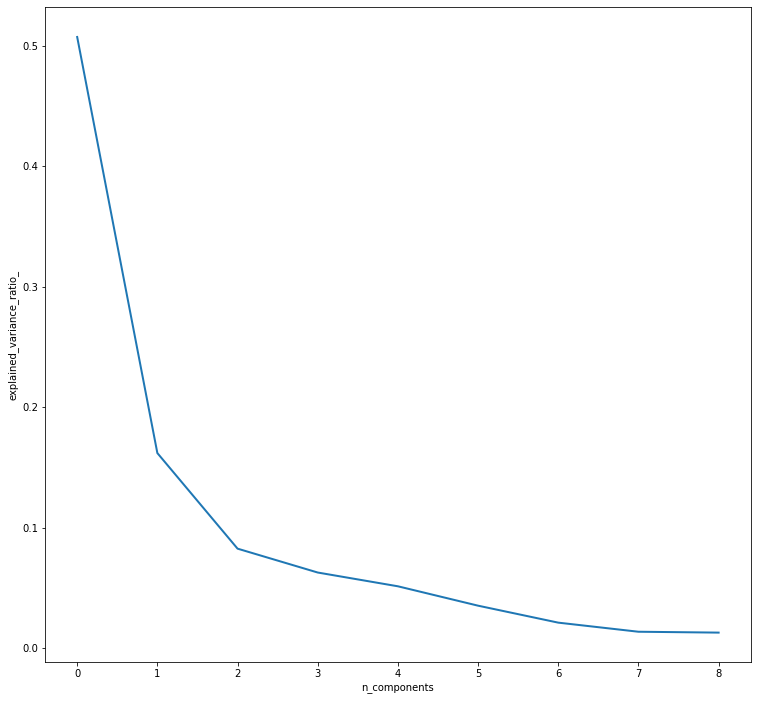

In [20]:
plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [11]:
#pca
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data)
scaled_data=scaler.transform(data)
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
scaled_data.shape

(569, 31)

In [12]:
x_pca.shape #features reduced from 27 to 9

(569, 11)

In [13]:
#pca with 2 principle components
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)
# PCA needs scaled data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
# Build PCA
pca = PCA(n_components = 2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca,columns=["PC1","PC2"])
pca_data["diagnosis"] = y


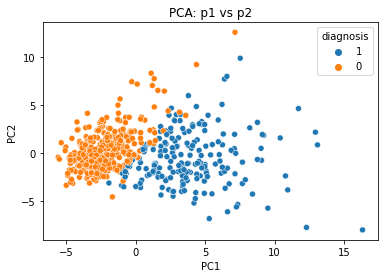

In [14]:
sns.scatterplot(x = "PC1", y = "PC2", hue = "diagnosis", data = pca_data);
plt.title("PCA: p1 vs p2");

The above fig. shows PCA with Principle component 1 and principle component 2. Two target classes, where orange is benign and blue is malignant, are almost linearly separable:

### Q.11  Based on your inference from the PCA plot, what kind of ML model would you suggest for this classification problem? Use that model of your choice and train it on the given dataset with all the features. Split data into train and test subsets before training the model. Report the model performance with confusion matrices, accuracy scores, and auc_roc_curves.

In [41]:
#Based on my inference i would K nearest neighbor for this problem.
#data after pca
pca_data.head()

,p1,p2,diagnosis
0,9.220840,1.866742,1
1,2.375798,-3.796282,1
2,5.740766,-1.128743,1
3,7.524616,9.868049,1
4,3.934946,-1.986964,1


In [43]:
y_pca = pca_data.diagnosis
x_pca = pca_data.drop(["diagnosis"],axis=1)

In [44]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y_pca, test_size=0.33, random_state=42)

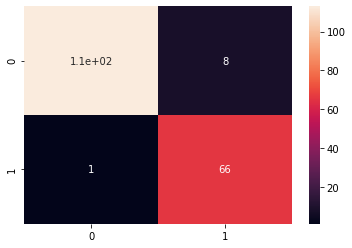

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       121
           1       0.89      0.99      0.94        67

    accuracy                           0.95       188
   macro avg       0.94      0.96      0.95       188
weighted avg       0.96      0.95      0.95       188

Accuracy of the model :  95.2127659574468


In [52]:
#K nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import log_loss, ConfusionMatrixDisplay, accuracy_score,roc_curve, auc, precision_recall_curve, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier()
knn.fit(x_train_pca, y_train_pca)
y_pred_pca = knn.predict(x_test_pca)
knn_cm_pca = confusion_matrix(y_test_pca,y_pred_pca)
knn_acc_pca = metrics.accuracy_score(y_test_pca, y_pred_pca)
cm=confusion_matrix(y_test_pca,y_pred_pca)
sns.heatmap(cm,annot=True)
plt.ioff()
plt.show()
print(classification_report(y_test_pca,y_pred_pca))
print("Accuracy of the model : ", metrics.accuracy_score(y_test_pca, y_pred_pca)*100)


In [54]:
knn_probs = knn.predict_proba(x_test_pca)
knn_probs = knn_probs[:, 1]
from sklearn.metrics import roc_curve, roc_auc_score
knn_auc = roc_auc_score(y_test_pca, knn_probs)
print('K Nearest Neighbor: AUROC = %.3f' % (knn_auc))

K Nearest Neighbor: AUROC = 0.993


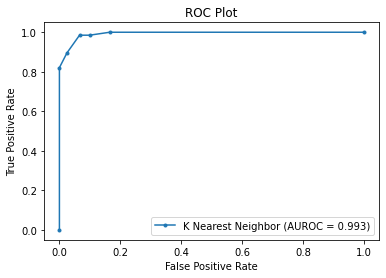

In [55]:
y_test_pca = [int(i) for i in y_test_pca]
knn_fpr, knn_tpr, _ = roc_curve(y_test_pca, knn_probs)
import matplotlib.pyplot as plt
plt.plot(knn_fpr, knn_tpr, marker='.', label= 'K Nearest Neighbor (AUROC = %0.3f)' % knn_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()